# Regressão Logistica

### Explicações simples sobre o modelo de Regressão Logistica

- **Regularizada** → significa que o modelo tem um controle para evitar *overfitting* (ou seja, não “decorar” os dados).  
  → Isso é feito ajustando os pesos para não crescerem demais.

- **liblinear**, **newton-cg**, **sag**, **saga** e **lbfgs** → são métodos diferentes usados para resolver o cálculo matemático dentro do modelo.  
  → Todos chegam ao mesmo resultado, mas alguns são mais rápidos ou melhores dependendo do tamanho e tipo dos dados.

- **Entradas densas e esparsas** → o modelo pode trabalhar com tabelas de dados normais (*densas*) ou com tabelas cheias de zeros (*esparsas*).

- **Matrizes ordenadas em C** e **matrizes CSR com floats de 64 bits** → é só uma recomendação técnica para que o modelo rode mais rápido (melhor desempenho).


### Solvers na Regressão Logística

Esses nomes — **"liblinear"**, **"newton-cg"**, **"lbfgs"**, **"sag"** e **"saga"** — são chamados de **solvers** (*ou métodos de otimização*).  
👉 Eles servem para **ajustar os pesos do modelo de Regressão Logística**, ou seja, encontrar os melhores valores que fazem o modelo aprender com os dados.

---

### 🧮 O que eles fazem (de forma geral)
Durante o treino, o modelo tenta **minimizar um erro matemático (função de custo)**.  
Esses solvers são formas diferentes de fazer esse cálculo — uns mais rápidos, outros mais precisos — depende do **tamanho dos dados** e do **tipo de problema**.

---

### ⚙️ Explicando cada um:

#### 1. **liblinear**
- Método padrão para conjuntos de dados **pequenos e simples**.  
- Usa uma técnica chamada *Coordinate Descent*, que ajusta um peso de cada vez.  
- Funciona bem com **poucos dados** e **poucos atributos (colunas)**.  
- **Limitação:** não funciona bem com problemas de **múltiplas classes (multiclasse)**, apenas binário.  

🧠 *Pense nele como alguém que ajusta cada botão do rádio, um de cada vez, até o som ficar bom.*

---

#### 2. **newton-cg**
- Usa um método mais sofisticado e preciso chamado *Newton Conjugate Gradient*.  
- É bom para **grandes conjuntos de dados** e **múltiplas classes**.  
- Um pouco mais lento, mas geralmente **mais estável**.  

🧠 *Imagine que ele olha para o formato inteiro da curva de erro e vai direto para o ponto mínimo — bem esperto, mas mais trabalhoso.*

---

#### 3. **lbfgs**
- Parecido com o *newton-cg*, mas usa **menos memória**.  
- Funciona bem em **dados médios ou grandes** e também com **multiclasse**.  
- É o solver **mais usado** e geralmente o **padrão recomendado** para a maioria dos casos.  

🧠 *É como uma versão “otimizada” do newton-cg — inteligente e econômico.*

---

#### 4. **sag (Stochastic Average Gradient)**
- Versão mais rápida do método de gradiente, ideal para **grandes conjuntos de dados**.  
- Atualiza os pesos um pouquinho por vez, usando apenas **uma parte dos dados a cada passo** (isso acelera o treino).  
- Funciona bem com muitos exemplos, mas **precisa que os dados estejam padronizados**.  

🧠 *É como alguém que aprende com pequenos grupos de exemplos em vez de olhar tudo de uma vez.*

---

#### 5. **saga**
- Evolução do *sag*.  
- Funciona bem com **dados grandes** e aceita **regularização L1** (que zera pesos desnecessários, tornando o modelo mais simples).  
- É o solver **mais flexível de todos** — bom para problemas grandes e com diferentes tipos de regularização.  

🧠 *É o “aprendiz moderno”: rápido, eficiente e sabe lidar com vários tipos de dados e configurações.*


### 🧠 Dicas práticas para escolher o solver

Use estas orientações para escolher o melhor **método de otimização (solver)** na Regressão Logística:

---

🔹 **Dataset pequeno + 2 classes** → use **liblinear**  
🔹 **Dataset médio + várias classes** → use **lbfgs**  
🔹 **Dataset grande + várias classes** → use **saga**  
🔹 **Quer regularização L1 (modelo esparso)** → use **saga** ou **liblinear**  
🔹 **Quer máxima precisão e pode esperar mais** → use **newton-cg**  
🔹 **Quer treino rápido com muitos dados** → use **sag**

---

💡 *Resumo:*  
- **liblinear** → rápido e simples  
- **lbfgs** → equilibrado e padrão  
- **sag/saga** → ideais para muitos dados  
- **newton-cg** → mais preciso, porém mais lento


In [1]:
from sklearn.linear_model import LogisticRegression

# Caso geral (médio/grande e multiclasse)
modelo = LogisticRegression(solver='lbfgs')

# Dados muito grandes e regularização L1
modelo = LogisticRegression(solver='saga', penalty='l1')

# Dados pequenos e binário
modelo = LogisticRegression(solver='liblinear')


### ⚙️ Exemplo: Testando cada solver

In [2]:
import numpy as np
import time
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1️⃣ Carregar um dataset de exemplo (números escritos à mão)
X, y = load_digits(return_X_y=True)

# 2️⃣ Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Padronizar os dados (necessário para sag e saga)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Lista dos solvers que vamos testar
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# 5️⃣ Testar cada solver e medir tempo e acurácia
for solver in solvers:
    print(f"\n🔹 Testando solver: {solver}")
    start = time.time()
    
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    
    print(f"⏱️ Tempo de treino: {end - start:.3f} segundos")
    print(f"🎯 Acurácia: {acc*100:.2f}%")



🔹 Testando solver: liblinear
⏱️ Tempo de treino: 0.185 segundos
🎯 Acurácia: 96.48%

🔹 Testando solver: newton-cg
⏱️ Tempo de treino: 0.084 segundos
🎯 Acurácia: 97.04%

🔹 Testando solver: lbfgs
⏱️ Tempo de treino: 0.063 segundos
🎯 Acurácia: 97.04%

🔹 Testando solver: sag
⏱️ Tempo de treino: 2.679 segundos
🎯 Acurácia: 97.04%

🔹 Testando solver: saga
⏱️ Tempo de treino: 4.324 segundos
🎯 Acurácia: 97.04%


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### ⚙️ Principais parâmetros da `LogisticRegression()`

#### 1. **solver**
👉 Define o **método matemático** usado para ajustar o modelo.  
É o que vimos antes: **'liblinear'**, **'lbfgs'**, **'newton-cg'**, **'sag'**, **'saga'**.

**Quando usar:** depende do **tamanho do dataset** e do **tipo de regularização**.

**Exemplo de uso:**

```python
from sklearn.linear_model import LogisticRegression

# Criando um modelo usando o solver 'lbfgs'
model = LogisticRegression(solver='lbfgs')


### 2. **penalty** (tipo de regularização)

👉 Controla o **tipo de regularização**, que serve para evitar *overfitting* (quando o modelo “decora” os dados).

- **'l2'** → mais comum, reduz pesos muito grandes.  
- **'l1'** → zera pesos desnecessários, deixando o modelo mais simples.  
- **'elasticnet'** → mistura L1 e L2.  
- **'none'** → sem regularização.

⚠️ Nem todos os solvers aceitam todos os tipos de regularização.  
Exemplo: **'saga'** aceita todos.

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2')


### 3. **C** (força da regularização)

👉 Controla a **força da regularização**.  
É o **inverso da regularização** (ou seja, quanto maior o `C`, **menos regularização**).

- **C grande** → modelo mais complexo (pode **decorar os dados**).  
- **C pequeno** → modelo mais simples (pode **perder precisão**).

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0)  # valor padrão


### 4. **max_iter** (número máximo de iterações)

👉 Define o **número máximo de iterações**, ou seja, quantas vezes o modelo tenta **ajustar os pesos até convergir**.

- Se o modelo demorar para “aprender” ou não convergir, você pode **aumentar esse valor**.

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)


### 5. **multi_class** (como lidar com múltiplas classes)

👉 Define como o modelo lida com **multiclasse** (várias categorias).

- **'auto'** → o Scikit-learn escolhe automaticamente.  
- **'ovr' (one-vs-rest)** → cria um modelo separado para cada classe.  
- **'multinomial'** → trata todas as classes juntas (geralmente melhor para **lbfgs** e **saga**).

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')


### 6. **fit_intercept** (incluir intercepto)

👉 Define se o modelo deve calcular o **intercepto (b₀)** da equação.

- **True** → inclui o intercepto (padrão).  
- **False** → não inclui o intercepto.

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True)


### 7. **random_state** (semente aleatória)

👉 Define a **semente aleatória** usada durante o treino — útil para **reproduzir os mesmos resultados** toda vez que você rodar o modelo.

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)


### 8. **tol** (tolerância do erro)

👉 Define a **tolerância do erro mínimo** — quando o erro fica menor que esse valor, o treino **para**.

- **Valor pequeno** → mais precisão, mas **mais tempo** de treino.  
- **Valor grande** → menos precisão, **treino mais rápido**.

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(tol=1e-4)


### 9. **n_jobs** (número de núcleos do processador)

👉 Define o **número de núcleos do processador** usados para acelerar o treino.

- **-1** → usa **todos os núcleos disponíveis**.

---

**Exemplo de uso no código:**

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1)


## ⚙️ Explicação do Codigo de Regressão Logistica do Git do Colab Notebook "Hands-on Machine Learning, 3rd edition"

In [3]:
from sklearn.linear_model import LogisticRegression

#Importa a função train_test_split, usada para dividir os dados em treino e teste.
# Isso é importante para avaliar o modelo com dados que ele ainda não viu.
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

# Cria a variável X com os dados de entrada (feature).
# Aqui, só usamos a largura da pétala (petal width) da flor Iris.
# .values transforma em um array do NumPy, que é o formato que o modelo precisa.
X = iris.data[["petal width (cm)"]].values

# Cria a variável y com o rótulo (target).
# iris.target dá o índice da espécie da flor (0, 1 ou 2).
# iris.target_names[iris.target] converte o índice para o nome real da espécie.
# == 'virginica' cria um vetor booleano (True/False):
# True → a flor é Virginica
# False → a flor não é Virginica
# Isso transforma o problema em uma classificação binária: Virginica ou não Virginica.
y = iris.target_names[iris.target] == 'virginica'

# Divide os dados em treino (train) e teste (test).
# X_train e y_train → usados para treinar o modelo
# X_test e y_test → usados para avaliar a performance do modelo
# random_state=42 → garante que a divisão seja reproduzível toda vez que rodar o código.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Cria uma instância do modelo de regressão logística.
# random_state=42 garante que os resultados sejam reproduzíveis.
log_reg = LogisticRegression(random_state=42)


# Treina o modelo usando os dados de treino (X_train, y_train).
# O modelo aprende a relação entre a largura da pétala e a probabilidade de ser Virginica.
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

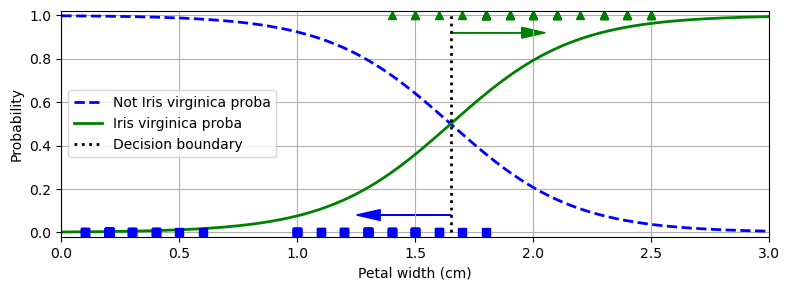

In [4]:
import matplotlib.pyplot as plt

from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Cria 1000 pontos igualmente espaçados entre 0 e 3 (largura da pétala).
# reshape(-1, 1) transforma o array em coluna, que é o formato exigido pelo modelo (n_amostras x n_features).
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector

# Usa o modelo treinado (log_reg) para prever a probabilidade de cada classe.
# y_proba[:, 0] → probabilidade de não Virginica
# y_proba[:, 1] → probabilidade de Virginica
y_proba = log_reg.predict_proba(X_new)

# Encontra o ponto onde a probabilidade de Virginica é 50%, ou seja, a fronteira de decisão.
# [0, 0] pega o primeiro valor da coluna, que é o limite exato no eixo X.
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]


# Cria uma nova figura do Matplotlib com largura 8 e altura 3 polegadas.
plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting

# Plota as probabilidades preditas:
# Azul tracejado → não Virginica
# Verde contínuo → Virginica
# linewidth=2 deixa as linhas mais grossas.
# label define o nome da legenda.
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")

# Plota uma linha vertical pontilhada preta na fronteira de decisão (50% de probabilidade).
# Vai de y=0 até y=1.
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
# Desenha setas indicando a direção das classes:
# Azul → não Virginica
# Verde → Virginica
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

# Plota os dados de treino reais:
# Quadrados azuis → não Virginica
# Triângulos verdes → Virginica
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

# Define os rótulos dos eixos X e Y.
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

# Mostra a legenda no canto central esquerdo.
plt.legend(loc="center left")

# Ajusta os limites dos eixos:
# X → 0 a 3
# Y → -0.02 a 1.02 (um pouco acima e abaixo de 0 e 1 para visualização)
plt.axis([0, 3, -0.02, 1.02])

# Adiciona linhas de grade no gráfico.
plt.grid()

# Salva o gráfico com o nome "logistic_regression_plot".
# Função save_fig normalmente é definida em outro lugar no código.
save_fig("logistic_regression_plot")

# Mostra o gráfico final na tela.
plt.show()

In [5]:
# O que ela faz
# log_reg → é o modelo de Regressão Logística já treinado.
# .predict() → é o método usado para fazer previsões de classes com novos dados.
# [[1.7], [1.5]] → são novas amostras que queremos classificar:
# Cada valor representa a largura da pétala (petal width) de uma flor.
# Os colchetes duplos [[ ]] transformam os dados em array de duas dimensões (necessário para o modelo, 
# mesmo com uma única feature).

# O que a função retorna
# Retorna um array com as classes previstas para cada entrada:
# Exemplo: [True, False] ou [1, 0], dependendo de como você definiu y.
# No caso do Iris Virginica, True significa que a flor é Virginica, e False significa não Virginica.

#Resumindo
# Essa linha pergunta ao modelo: “Para uma pétala de largura 1.7 e 1.5 cm, essas flores são 
# Virginica ou não?”
# O modelo responde com as classes previstas.
log_reg.predict([[1.7], [1.5]])

array([ True, False])

### 💡 Resumo do que o gráfico mostra

- **Pontos** → dados reais  
- **Contornos** → probabilidade da classe *Virginica*  
- **Linha pontilhada** → fronteira de decisão  
- **Texto** → regiões correspondentes a cada classe


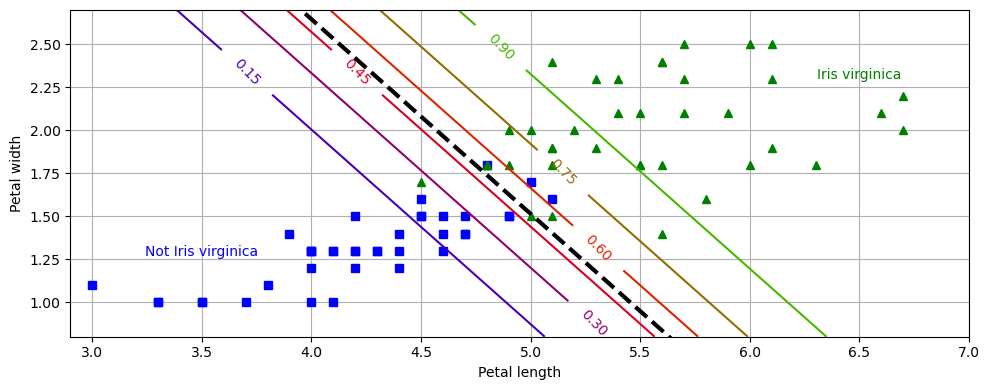

In [6]:
# extra code – this cell generates and saves Figure 4–24


# Cria a variável X com as duas features escolhidas: comprimento e largura da pétala.
# .values transforma em array NumPy, formato necessário para o modelo.
X = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Cria a variável y com as classes booleanas:
# True → Iris Virginica
# False → não Virginica
y = iris.target_names[iris.target] == 'virginica'

# Divide os dados em treino e teste.
# random_state=42 garante reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Cria o modelo de Regressão Logística com regularização um pouco mais fraca (C=2).
# Treina o modelo com os dados de treino.
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
# Cria uma grade de pontos (meshgrid) que cobre o espaço das duas features:
# x0 → comprimento da pétala
# x1 → largura da pétala
# Esses pontos vão ser usados para desenhar as curvas de probabilidade no gráfico.
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))

# Junta x0 e x1 em um array de instâncias, um ponto por linha.
# .ravel() transforma cada grade em vetor, e np.c_[] concatena em colunas.
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure

# Calcula a probabilidade de cada ponto pertencer à classe Virginica (True) ou não (False).
y_proba = log_reg.predict_proba(X_new)

# Pega a probabilidade da classe Virginica ([:,1]) e reforma no formato da grade para 
# poder plotar o contorno.
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
# left_right → limites do eixo x (comprimento da pétala).
# boundary → calcula a linha de decisão da regressão logística usando a fórmula da reta:
# y = -(coef1 * x + intercept) / coef2
# Essa linha separa as duas classes.
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

# Cria a figura do gráfico com tamanho personalizado.
plt.figure(figsize=(10, 4))

# Plota os dados de treino reais:
# Quadrados azuis → não Virginica
# Triângulos verdes → Virginica
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")

# Plota o gráfico de contorno das probabilidades, colorindo a região segundo a chance de ser Virginica.
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)

# Plota a linha de decisão (pontilhada preta) que separa as classes.
plt.plot(left_right, boundary, "k--", linewidth=3)

# Adiciona textos indicando as regiões correspondentes a cada classe.
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")

# Define rótulos, limites dos eixos e grade.
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

# Salva o gráfico com nome "logistic_regression_contour_plot" e exibe na tela.
save_fig("logistic_regression_contour_plot")
plt.show()

### 1️⃣ O que é Softmax Regression

- É uma **generalização da Regressão Logística** para mais de duas classes.  
- Enquanto a regressão logística tradicional funciona apenas para **dois resultados** (ex: sim/não), a **Softmax** consegue lidar com **três, quatro ou mais classes** ao mesmo tempo.  
- Em vez de calcular uma probabilidade entre 0 e 1 como na regressão logística binária, ela calcula uma **probabilidade para cada classe**, e a **soma de todas sempre dá 1**.

---

### 2️⃣ Como é usada

- Cada classe recebe um **peso** e um **intercepto**.  
- Para cada entrada (ex: características de uma flor), o modelo calcula uma **pontuação para cada classe**.  
- Aplica a função **softmax**:

$$
P(y=k \mid x) = \frac{e^{z_k}}{\sum_j e^{z_j}}
$$

- Onde \(z_k\) é a pontuação da classe \(k\).  
- Isso transforma as pontuações em **probabilidades entre 0 e 1**.  
- O modelo escolhe a **classe com maior probabilidade** como previsão final.

---

### 3️⃣ Para que serve

- É usada para **classificação multiclasse**.  

**Exemplos:**

- Reconhecer o tipo de flor no dataset Iris (**setosa, versicolor, virginica**)  
- Classificar dígitos manuscritos (**0 a 9**)  
- Detectar categorias de imagens ou textos  
- Pode ser combinada com **redes neurais**, onde a Softmax aparece na última camada para gerar probabilidades das classes.


## ⚙️ Exemplo de Codigo

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# 1️⃣ Carregar o dataset Iris
iris = load_iris()
X = iris.data[:, 2:]  # usamos comprimento e largura da pétala
y = iris.target        # classes: 0=setosa, 1=versicolor, 2=virginica

# 2️⃣ Criar e treinar o modelo de Softmax Regression
# multi_class='multinomial' ativa a softmax
# solver='lbfgs' é recomendado para multinomial
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, max_iter=1000)
softmax_reg.fit(X, y)

# 3️⃣ Prever probabilidades para novas amostras
X_new = np.array([[1.5, 0.2],   # exemplo 1
                  [4.5, 1.5],   # exemplo 2
                  [5.5, 2.0]])  # exemplo 3

probs = softmax_reg.predict_proba(X_new)  # probabilidades para cada classe
preds = softmax_reg.predict(X_new)        # classe com maior probabilidade

# 4️⃣ Mostrar resultados
for i, x in enumerate(X_new):
    print(f"\nEntrada: {x}")
    print(f"Probabilidades: setosa={probs[i,0]:.2f}, versicolor={probs[i,1]:.2f}, virginica={probs[i,2]:.2f}")
    print(f"Classe prevista: {iris.target_names[preds[i]]}")



Entrada: [1.5 0.2]
Probabilidades: setosa=1.00, versicolor=0.00, virginica=0.00
Classe prevista: setosa

Entrada: [4.5 1.5]
Probabilidades: setosa=0.00, versicolor=0.93, virginica=0.07
Classe prevista: versicolor

Entrada: [5.5 2. ]
Probabilidades: setosa=0.00, versicolor=0.01, virginica=0.99
Classe prevista: virginica


## ⚙️ Outro exemplo de codigo

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# 1️⃣ Dados de exemplo
# Features (ex: duas características de cada ponto)
X = np.array([[1], [2], [3], [4], [5], [6]])
# Classes (0, 1 ou 2)
y = np.array([0, 0, 1, 1, 2, 2])

# 2️⃣ Criar e treinar o modelo Softmax
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# 3️⃣ Prever probabilidades e classes para novos pontos
X_new = np.array([[1.5], [3.5], [5.5]])
probs = model.predict_proba(X_new)
preds = model.predict(X_new)

# 4️⃣ Mostrar resultados
for i, x in enumerate(X_new):
    print(f"\nEntrada: {x}")
    print(f"Probabilidades: classe0={probs[i,0]:.2f}, classe1={probs[i,1]:.2f}, classe2={probs[i,2]:.2f}")
    print(f"Classe prevista: {preds[i]}")



Entrada: [1.5]
Probabilidades: classe0=0.74, classe1=0.24, classe2=0.02
Classe prevista: 0

Entrada: [3.5]
Probabilidades: classe0=0.24, classe1=0.53, classe2=0.24
Classe prevista: 1

Entrada: [5.5]
Probabilidades: classe0=0.02, classe1=0.24, classe2=0.74
Classe prevista: 2


## ⚙️ Explicação do Codigo de Regressão  SoftMax do Git do Colab Notebook "Hands-on Machine Learning, 3rd edition"

### ⚠️ Observação sobre o código

No código original, um **erro acontece** porque você está tentando usar colunas nomeadas:

```python
["petal length (cm)", "petal width (cm)"]




### 💡 Opção 1 para consertar esse erro – Converter para DataFrame e usar nomes

Se você realmente quiser usar os **nomes das colunas**:


In [11]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [14]:


# Cria a matriz de features X com duas colunas: comprimento e largura da pétala.
# .values transforma o DataFrame em array NumPy, que o modelo precisa para treinar.
X = iris_df[["petal length (cm)", "petal width (cm)"]].values

# Cria o vetor de classes y.
# iris["target"] contém os valores 0, 1 ou 2, que correspondem às espécies:
# 0 → setosa
# 1 → versicolor
# 2 → virginica
y = iris["target"]

# Divide os dados em treino e teste:
# X_train e y_train → usados para treinar o modelo
# X_test e y_test → usados para testar o modelo depois
# random_state=42 garante que a divisão seja reproduzível toda vez que rodar o código.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Cria o modelo de Regressão Logística.
# C=30 → regularização mais fraca, permitindo que o modelo se ajuste melhor aos dados.
# random_state=42 garante reprodutibilidade.
# Por padrão, quando há mais de duas classes, o Scikit-learn usa Softmax (multinomial).
softmax_reg = LogisticRegression(C=30, random_state=42)


# Treina o modelo com os dados de treino (X_train e y_train).
# O modelo aprende como as duas features (comprimento e largura da pétala) se relacionam com 
# cada classe de flor.
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [16]:
# O que ela faz
# softmax_reg → é o modelo de Softmax Regression que você treinou com os dados do Iris.
# .predict() → método que retorna a classe prevista para um novo ponto de entrada.
# [[5, 2]] → é o novo ponto que você quer classificar:
# 5 → comprimento da pétala
# 2 → largura da pétala
# Os colchetes duplos [[]] são necessários para que o modelo receba um array 2D (n_amostras x n_features), 
# mesmo que seja apenas uma amostra.


# O que a função retorna
# Retorna um array com a classe prevista para o ponto [5, 2].
# No caso do Iris, as classes são:
# 0 → setosa
# 1 → versicolor
# 2 → virginica
# Por exemplo, se o modelo prever [2], significa que ele acha que a flor é Virginica.
softmax_reg.predict([[5, 2]])


array([2])

In [18]:
# O que cada parte faz
# softmax_reg
# É o modelo de Softmax Regression que você treinou.
# predict_proba([[5, 2]])
# Calcula a probabilidade de cada classe para o ponto [5, 2] (comprimento=5, largura=2).
# Retorna um array com probabilidades para cada classe:
# Ex.: [0.01, 0.15, 0.84] → 1% setosa, 15% versicolor, 84% virginica.
# .round(2)
# Arredonda cada probabilidade para 2 casas decimais, para ficar mais fácil de ler.
# Ex.: [0.01, 0.15, 0.84] → [0.01, 0.15, 0.84] (mesmo valor, mas formatado).
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

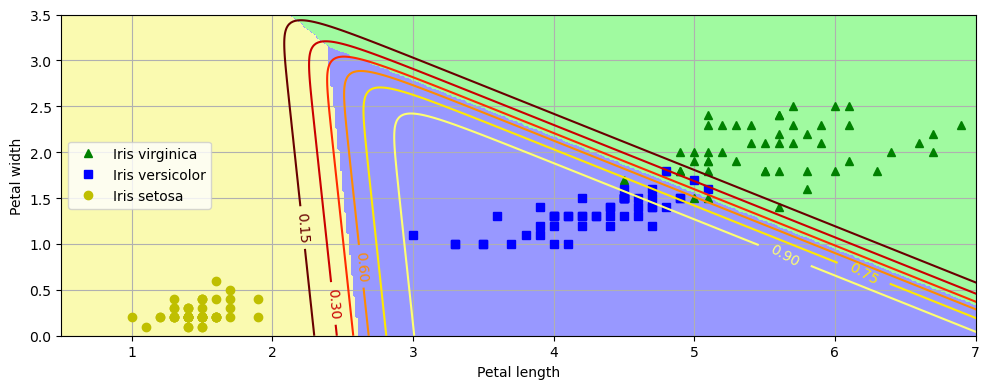

In [19]:
# Importa a função para criar mapas de cores personalizados, usados para colorir regiões do gráfico.
from matplotlib.colors import ListedColormap

# Cria um mapa de cores personalizado com três cores diferentes, uma para cada classe de flor:
# "#fafab0" → setosa
# "#9898ff" → versicolor
# "#a0faa0" → virginica
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

# Cria uma grade de pontos no plano comprimento × largura da pétala:
# x0 → eixo X (petal length)
# x1 → eixo Y (petal width)
# Esses pontos vão servir para colorir o fundo do gráfico de acordo com a classe prevista.
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))


# Junta os vetores x0 e x1 em um array de instâncias, uma linha para cada ponto da grade.
# .ravel() transforma cada grade em vetor, e np.c_[] combina em colunas.
X_new = np.c_[x0.ravel(), x1.ravel()]

# y_proba → calcula as probabilidades de cada classe para todos os pontos da grade.
# y_predict → calcula a classe mais provável para cada ponto da grade.
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)


# zz1 → probabilidade da classe 1 (versicolor) reformulada no formato da grade, usada para desenhar o
# contorno das probabilidades.
# zz → classe prevista para cada ponto da grade, usada para colorir as regiões do fundo do gráfico.
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

# Preenche o fundo do gráfico com cores de acordo com a classe prevista pelo modelo para cada ponto 
# da grade.
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# Desenha contornos de probabilidade da classe versicolor usando zz1
# clabel adiciona os valores das linhas de contorno no gráfico.
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()